In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.model_selection

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import japanize_matplotlib

import seaborn as sns

In [2]:
X = pd.read_excel("data/chapter07.xlsx")
X.head()

,年齢,日照時間,購入
0,13.894450,14.513776,1
1,12.042179,14.694753,1
2,8.250391,20.162030,1
3,46.265285,4.315196,2
4,31.819373,15.986628,1


In [3]:
len(X)

250

<Axes: xlabel='年齢', ylabel='日照時間'>

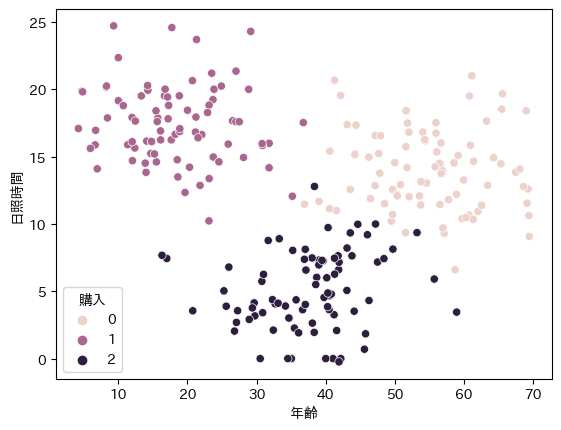

In [4]:
sns.scatterplot(
    x="年齢",
    y="日照時間",
    hue="購入",
    data=X
)

In [5]:
y = X["購入"]
X2 = X.copy().drop("購入", axis=1)
X2

,年齢,日照時間
0,13.894450,14.513776
1,12.042179,14.694753
2,8.250391,20.162030
3,46.265285,4.315196
4,31.819373,15.986628
...,...,...
245,25.986892,6.795635
246,13.323766,19.502334
247,40.279118,3.854857
248,12.460022,17.637438


In [6]:
[
    X_train,
    X_test,
    y_train,
    y_test
] = sklearn.model_selection.train_test_split(
    X2, y, random_state=0
)

In [7]:
len(X_train)

187

In [8]:
len(X_test)

63

In [9]:
model = DecisionTreeClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [10]:
score_te = model.score(X_test, y_test)
print("正解率", score_te * 100, "%")

正解率 98.4126984126984 %


In [11]:
score_tr = model.score(X_train, y_train)
print("正解率", score_tr * 100, "%")

正解率 98.3957219251337 %


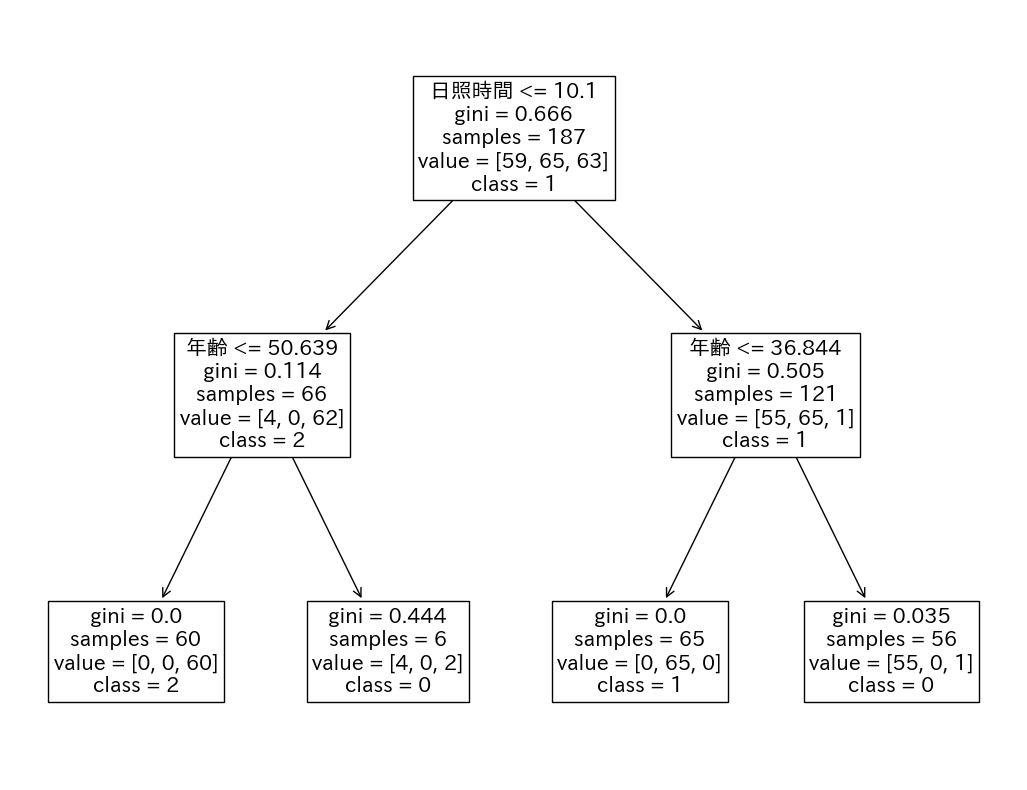

In [12]:
plt.figure(figsize=(13, 10))
plot_tree(
    model,
    fontsize=15,
    feature_names=["年齢", "日照時間"],
    class_names=["0", "1", "2"]
)
plt.show()